<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

NOTA : este notebook se basa en A REGRESSION PROJECT IN PYTHON; PREDICT DIAMONDS PRICES BASED ON CUT, COLOR; CLARITY AND OTHER ATRIBUTES, creado por Roi Polanitzer.

https://medium.com/@polanitzer/a-regression-project-in-python-predict-diamonds-prices-based-on-cut-color-clarity-and-other-d856c0ba9a2c


# FASE 1 : COMPRENDER EL NEGOCIO

De Beers es la Compañia de diamantes más grande del mundo.
De Beers necesita saber el precio de mercado actualizado (en
dólares estaunidenses) de cualquier diamante que venda.

Se necesita crear un modelo que prediga, con un alto nivel de
precisión, el precio de mercado en dólares estaunidenses de un
diamante al relacionar los precios de los diamantes vendidos
anteriormente.


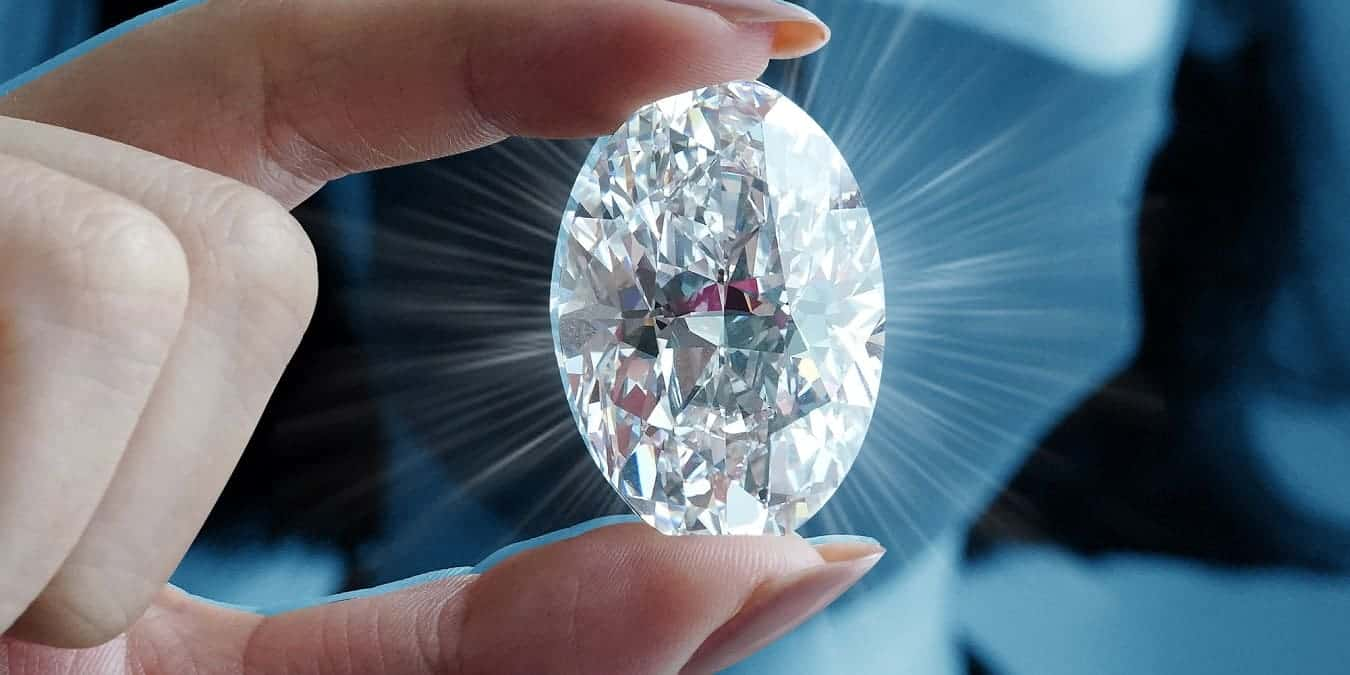

In [14]:
import pandas as pd
import numpy as np
import seaborn as sb


In [15]:
# **
# Leer el archivo Diamons.csv
#
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")

Saving 2.4.3_Diamonds.csv to 2.4.3_Diamonds (1).csv


# FASE 2 : COMPRENDER LO DATOS

In [16]:
df.shape

(53940, 11)

In [17]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [18]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [20]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [21]:
# Usaremos un método resumen de estadísticas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [22]:
# Las filas de conteo, media, mínimo y máximo se explican por sí mismas.
# El std muestra la desviación estándar y las filas 25%, 50% y 75% muestran los percentiles correspondientes.

In [23]:
df.columns

df2=df.drop(['Unnamed: 0'],axis=1)


In [24]:
df2.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [25]:
numeric_columns = df2.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
corr_matrix["price"].sort_values(ascending=False)


price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

In [26]:
df2.query('x==0 or y==0 or z==0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


<Axes: xlabel='carat', ylabel='price'>

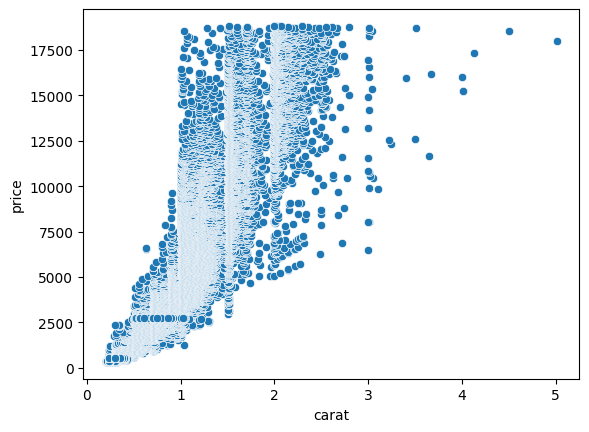

In [27]:
sb.scatterplot(x=df2.carat , y=df2.price)

In [28]:
len(df2.query('carat>3'))

32

In [29]:
len(df2.query('carat>2'))

1889

<ipython-input-30-8fbf4c50bc1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df2.price)


<Axes: xlabel='price', ylabel='Density'>

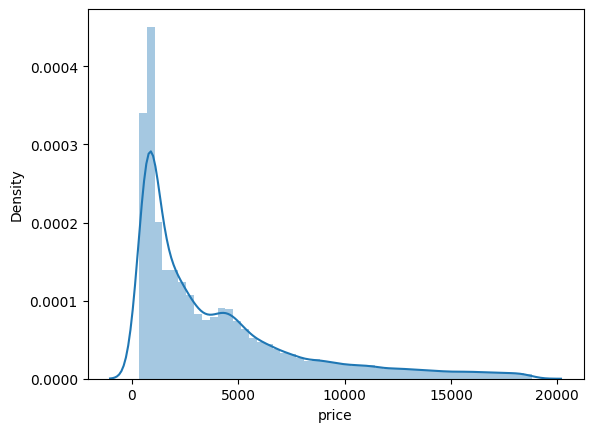

In [30]:
sb.distplot(df2.price)

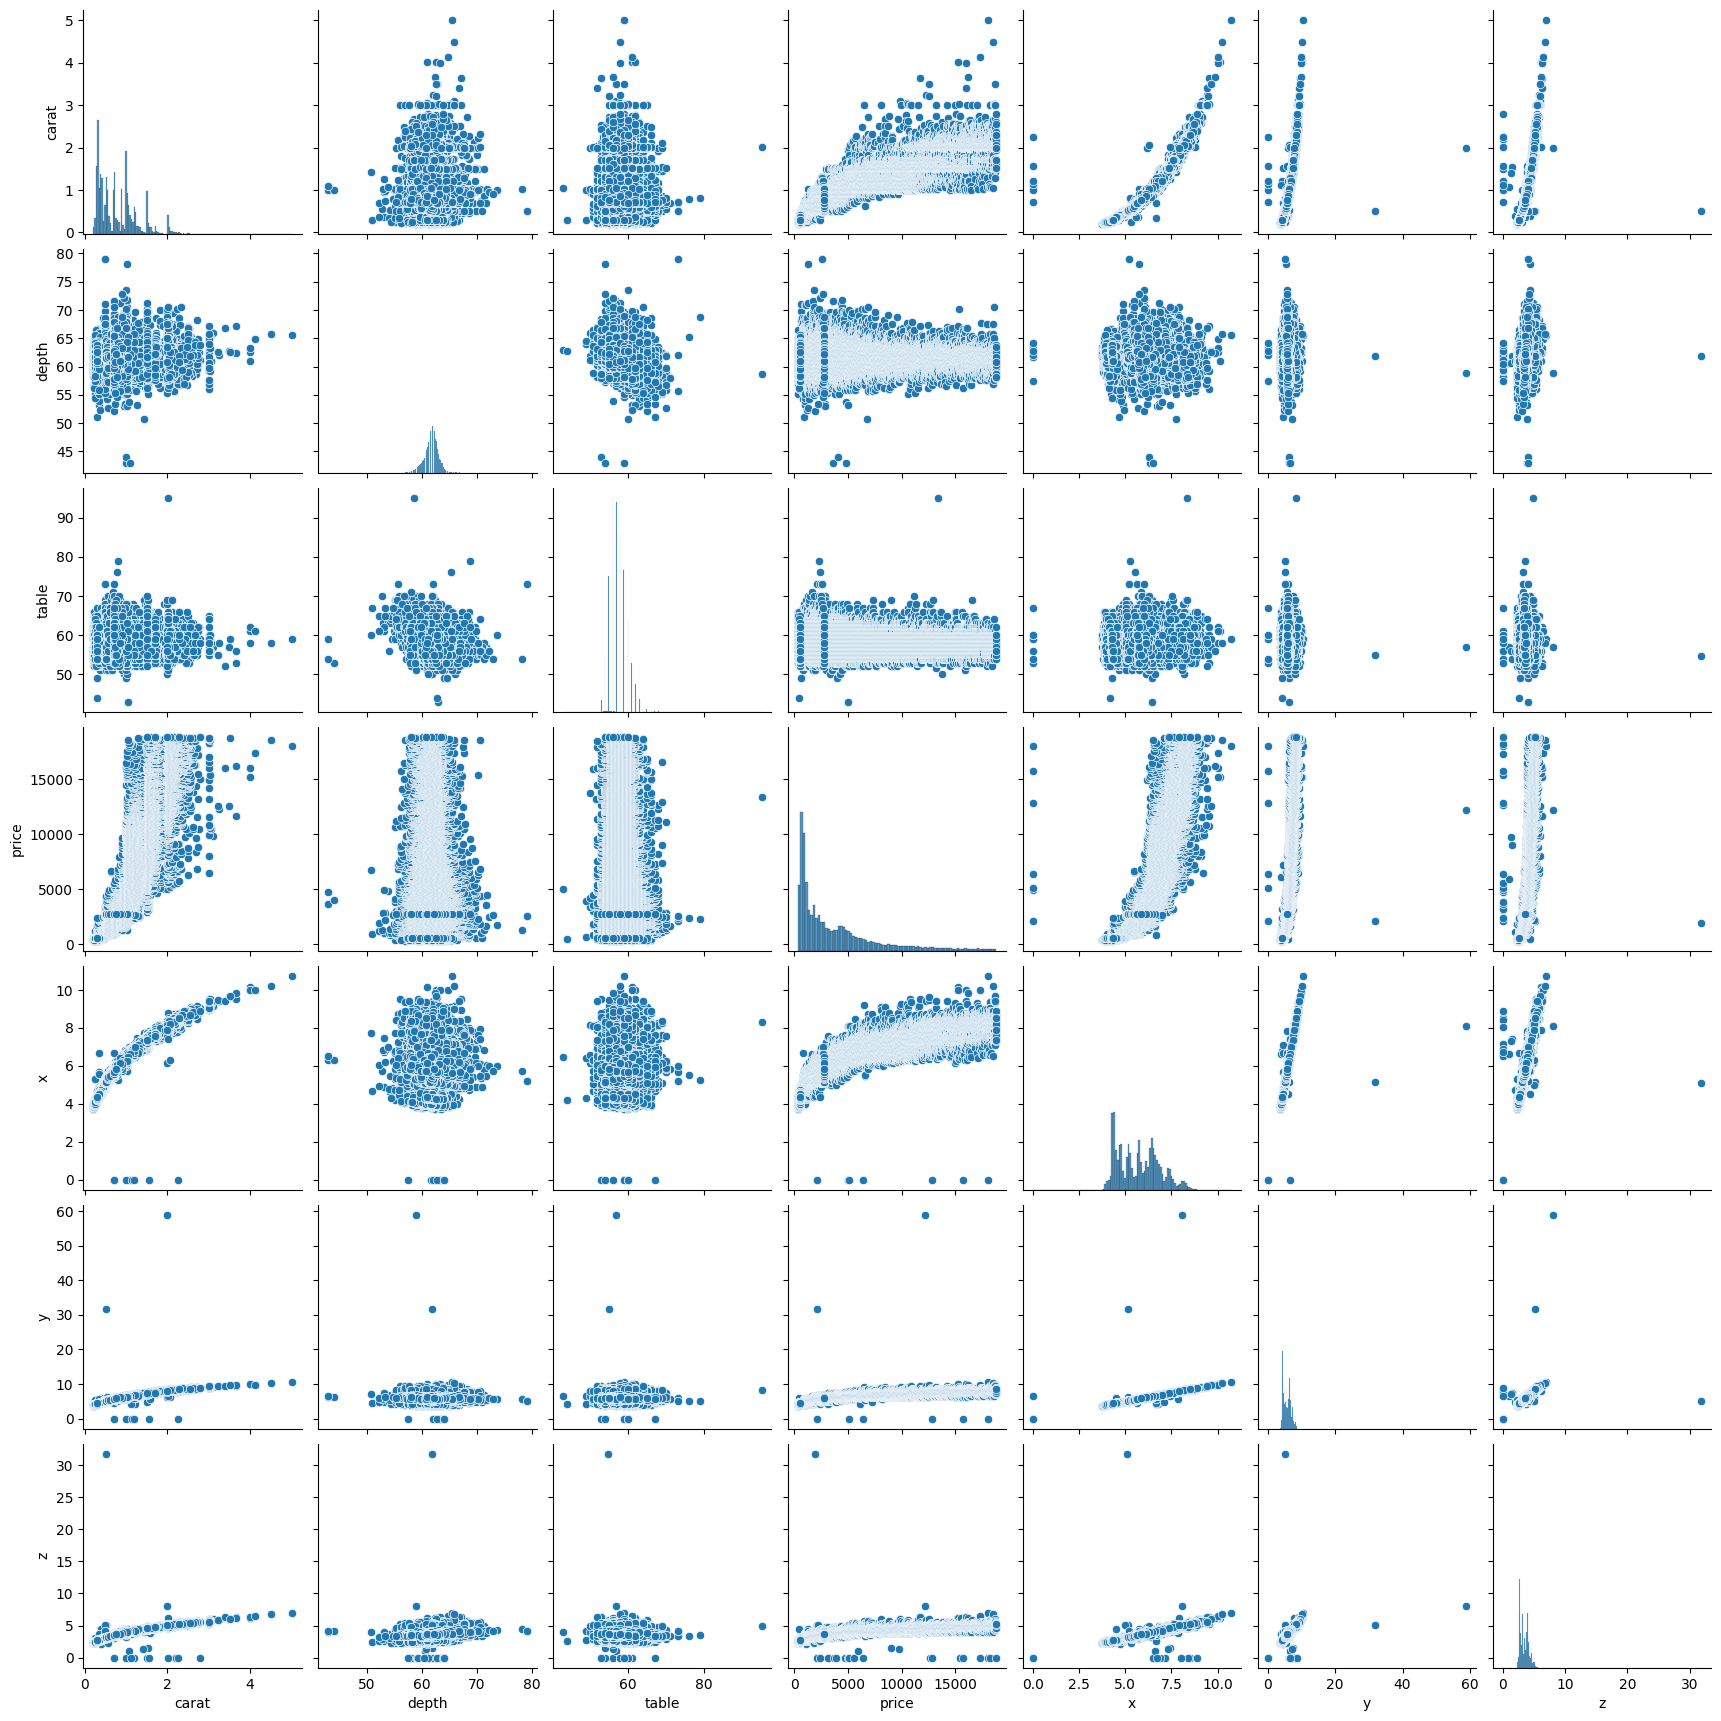

In [31]:
sb.pairplot(df2)

# FASE 3 : PREPARAR LOS DATOS

In [32]:
# Remover outliers
df2.query('z>10 or y>10')

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [33]:
df2.query('z>10 or y>10').index

Index([24067, 25998, 27415, 27630, 48410, 49189], dtype='int64')

In [34]:
df2.drop(df2.query('z>10 or y>10').index, inplace=True)

In [35]:
df2.query('x==0 or y==0 or z==0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [36]:
df2.query('x==0 or y==0 or z==0').index

Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951, 24394,
       24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556, 49557, 51506],
      dtype='int64')

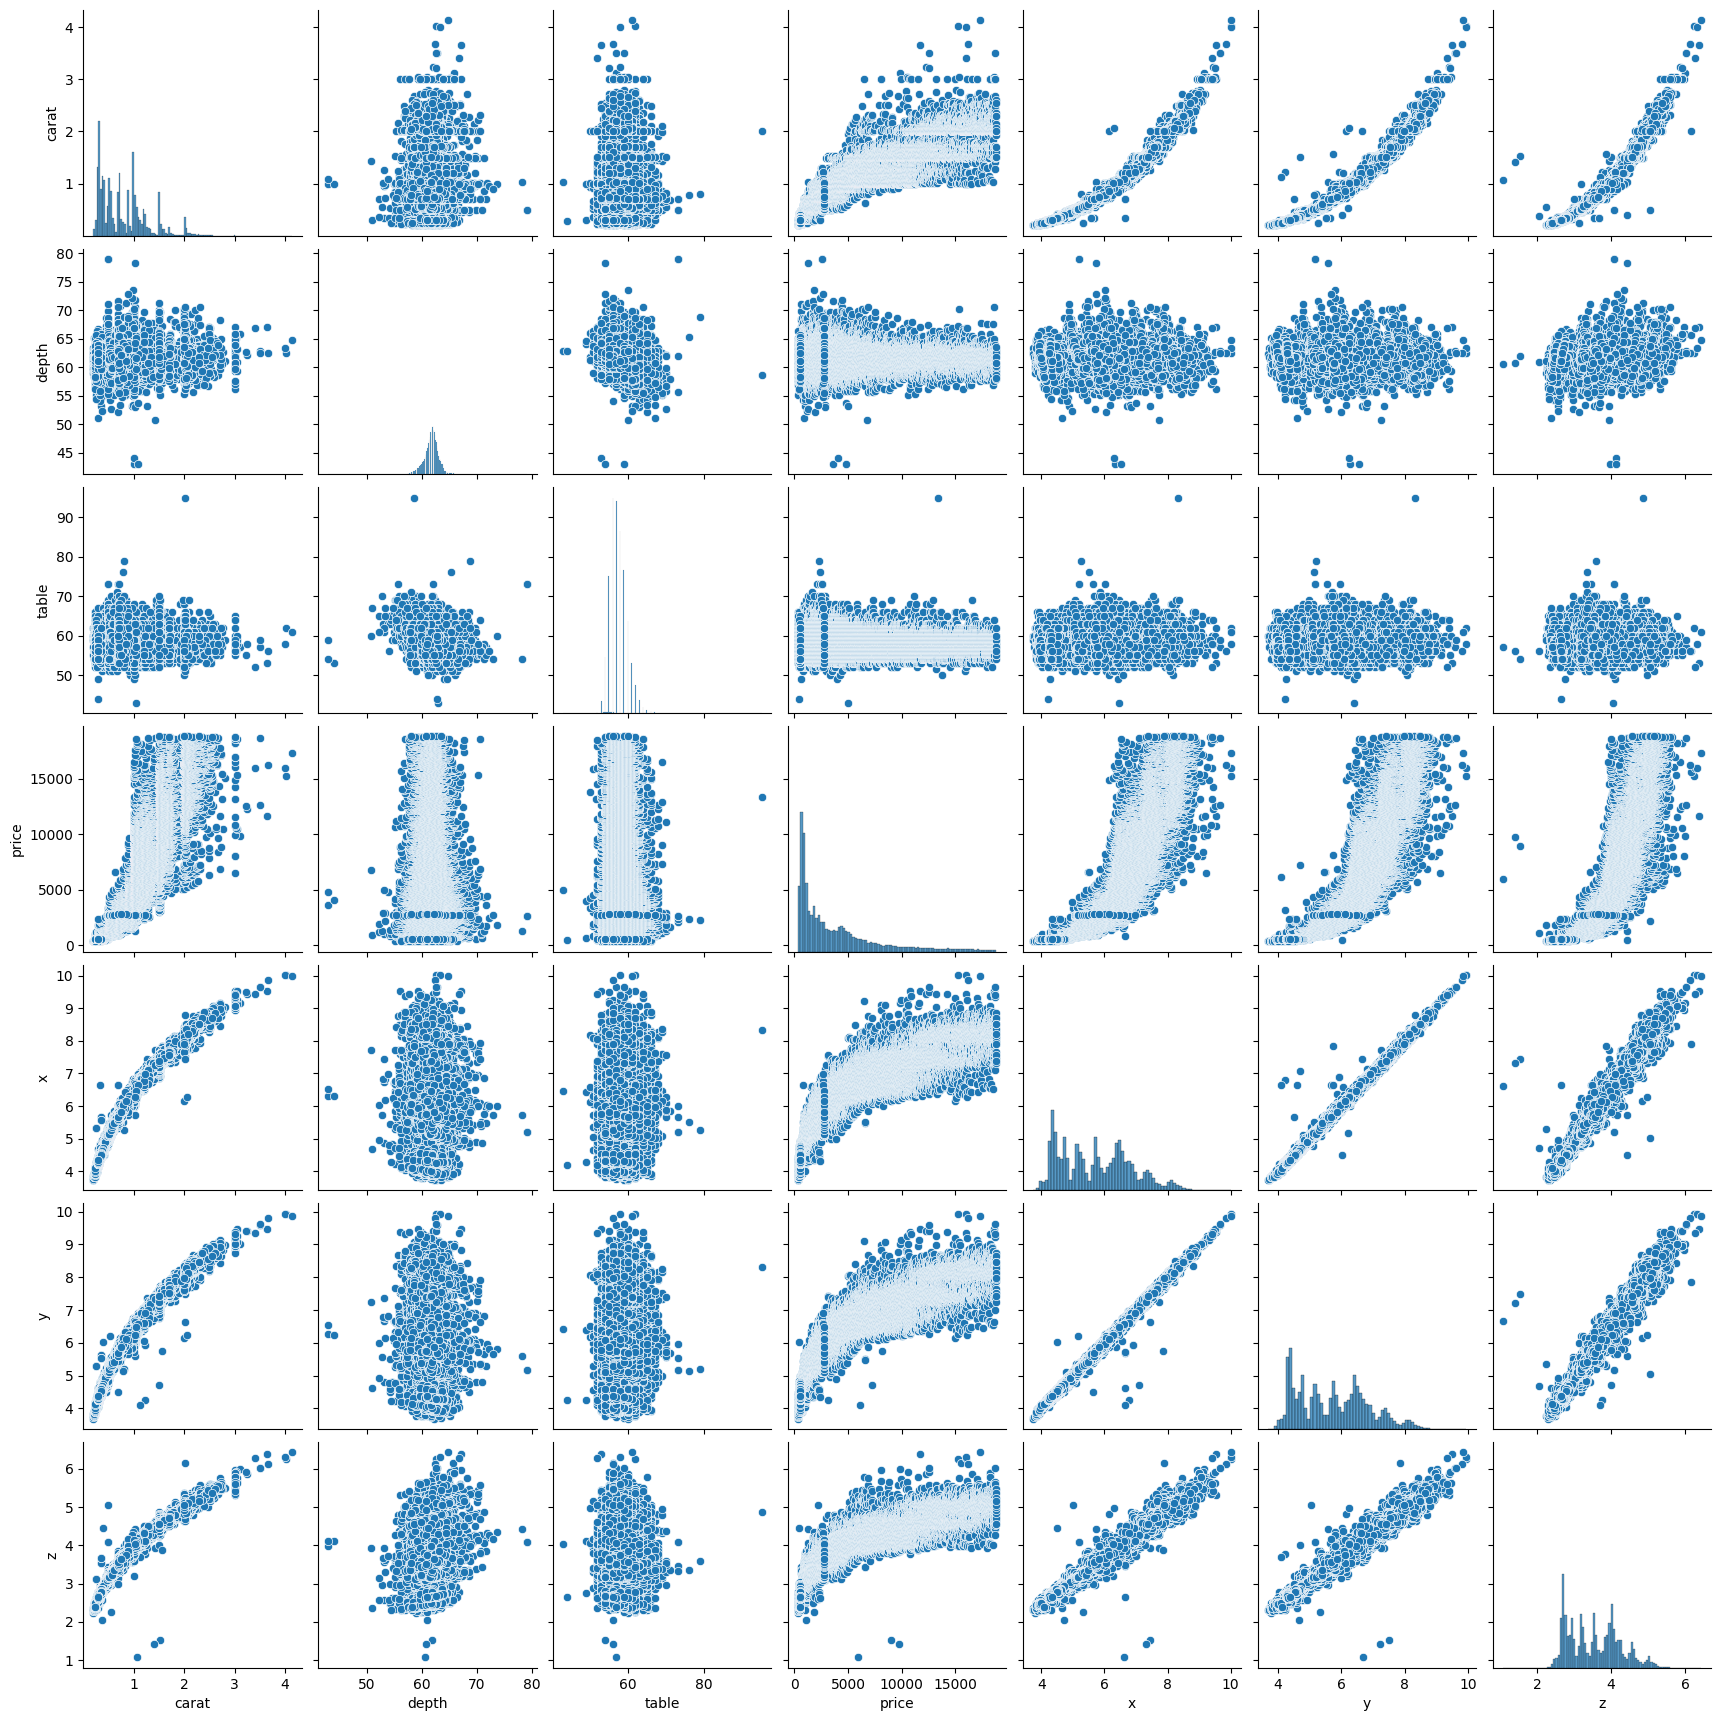

In [37]:
df2.drop(df2.query("x==0 or y==0 or z==0").index, inplace=True)
sb.pairplot(df2)

In [38]:
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
df2["vol"] = df.x * df.y * df.z
df2.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [40]:
df2.drop(["x","y","z"], axis=1, inplace=True)
df2.head()


,carat,cut,color,clarity,depth,table,price,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [41]:
# Creación de variables Dummy
df2.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [42]:
df2.cut.replace({"Ideal":5, "Premium":4, "Good":2, "Very Good":3, "Fair":1}, inplace=True)
df2.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,5,E,SI2,61.5,55.0,326,38.202030
1,0.21,4,E,SI1,59.8,61.0,326,34.505856
2,0.23,2,E,VS1,56.9,65.0,327,38.076885
3,0.29,4,I,VS2,62.4,58.0,334,46.724580
4,0.31,2,J,SI2,63.3,58.0,335,51.917250


In [43]:
df2.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [44]:
df2.color.replace({"E":2, "I":6, "J":7, "H":5, "F":3, "G":4, "D":1}, inplace=True)
df2.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,5,2,SI2,61.5,55.0,326,38.202030
1,0.21,4,2,SI1,59.8,61.0,326,34.505856
2,0.23,2,2,VS1,56.9,65.0,327,38.076885
3,0.29,4,6,VS2,62.4,58.0,334,46.724580
4,0.31,2,7,SI2,63.3,58.0,335,51.917250


In [45]:
df2.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [46]:
df2.clarity.replace({"SI2":1, "SI1":2, "VS1":3, "VS2":4, "VVS2":5, "VVS1":6, "I1":7, "IF":8}, inplace=True)
df2.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,5,2,1,61.5,55.0,326,38.202030
1,0.21,4,2,2,59.8,61.0,326,34.505856
2,0.23,2,2,3,56.9,65.0,327,38.076885
3,0.29,4,6,4,62.4,58.0,334,46.724580
4,0.31,2,7,1,63.3,58.0,335,51.917250


In [47]:
# Separamos en Train y Test
X = df2.drop(["price"], axis=1)
X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.23,5,2,1,61.5,55.0,38.202030
1,0.21,4,2,2,59.8,61.0,34.505856
2,0.23,2,2,3,56.9,65.0,38.076885
3,0.29,4,6,4,62.4,58.0,46.724580
4,0.31,2,7,1,63.3,58.0,51.917250


In [48]:
y = df2["price"]
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# FASE 4: MODELAMIENTO

Atención : se usarán conceptos aún no vistos

In [50]:
# Se usara una Regresión Lineal, uno de los modelos más comunes.
#
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [51]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 88.40%
R squared of the Linear Regression on test set: 88.54%


In [52]:
# La R al cuadrado del conjunto de entrenamiento es casi igual a la R al cuadrado del conjunto de prueba.
# Esto es un indicativo de que nuestro modelo de regresión lineal no se está sobreajustando y, por lo tanto,
# se está generalizando bien a los datos nuevos.
# Además, en nuestro modelo de regresión lineal, el 88,54 % de la variabilidad en los precios de los diamantes
# puede explicarse utilizando las 7 características que elegimos
# (es decir, quilate, corte, color, claridad, tabla, profundidad y volumen). Esto es muy bueno.

<Axes: xlabel='price'>

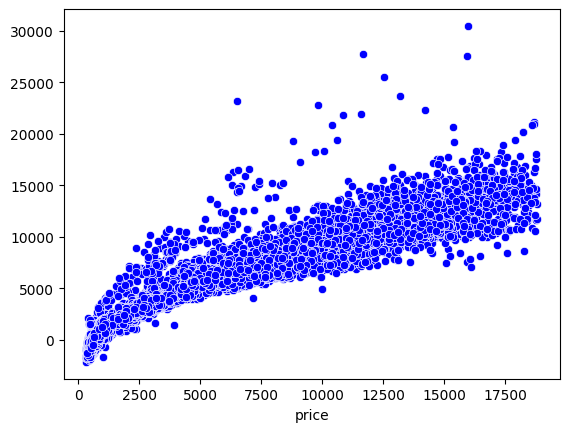

In [53]:
y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="blue")


In [54]:
# Usaremos otro modelo, un árbol de decisión para regresión
#
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [55]:
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 99.99%
R squared of the Decision Tree Regressor on test set: 96.73%


In [56]:
# La R cuadrada en el conjunto de entrenamiento es un poco más alta que la R cuadrada en el conjunto de prueba,
# pero eso no significa que nuestro modelo de regresor del árbol de decisión esté sobreajustado.
# Por el contrario, nuestro modelo de regresor de árbol de decisión se está generalizando bien a nuevos datos.
# Además, en nuestro modelo de regresor de árbol de decisiones, el 96,73 % de la variabilidad en los precios
# de los diamantes se puede explicar utilizando las 7 características que elegimos
# (es decir, quilate, corte, color, claridad, tabla, profundidad y volumen). Esto es excelente.

<Axes: xlabel='price'>

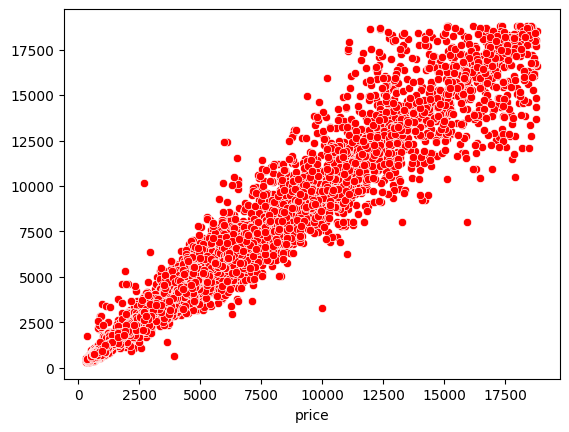

In [57]:
y_pred1 = tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred1, color="red")


In [58]:
# Aplicaremos otro modelo: un bosque aleatorio de árboles de decisión
#
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(rf.score(X_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.72%
R squared of the Random Forest Regressor on test set: 98.14%


In [60]:
# La R cuadrada en el conjunto de entrenamiento es un poco más alta que la R cuadrada en el conjunto de prueba,
# pero eso no significa que nuestro modelo de regresor de bosque aleatorio esté sobreajustado.
# Por el contrario, nuestro modelo de regresor de bosque aleatorio se está generalizando bien a nuevos datos.
# Además, en nuestro modelo de regresor de bosque aleatorio, el 98,15 % de la variabilidad en los precios
# de los diamantes puede explicarse utilizando las 7 características que elegimos
# (es decir, quilate, corte, color, claridad, tabla, profundidad y volumen). Esto es excelente.

<Axes: xlabel='price'>

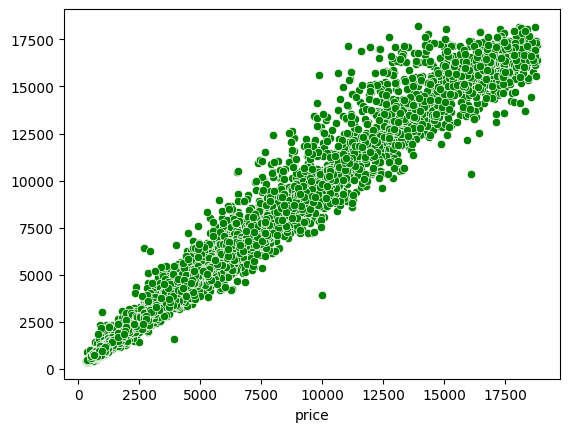

In [61]:
y_pred2 = rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred2, color="green")


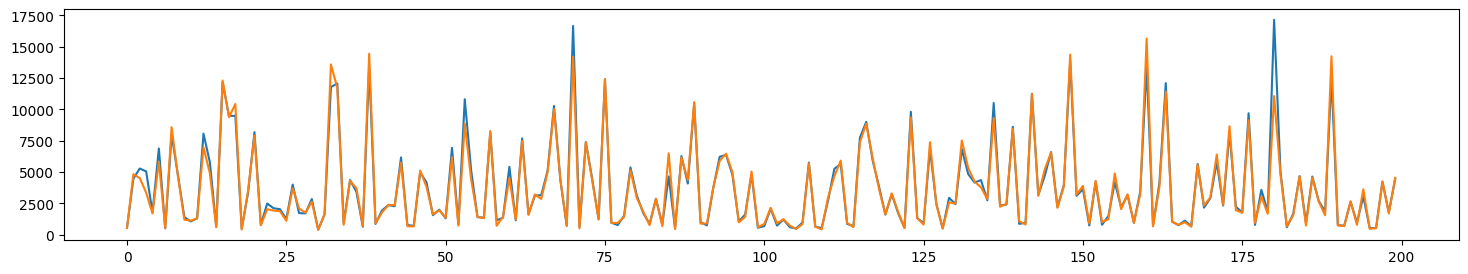

In [63]:
import matplotlib.pyplot as plt
plt.subplots(1, 1, figsize=(18,3))
plt.plot(y_test.iloc[100:300].reset_index(drop=True).index, y_pred2[100:300]);
plt.plot(y_test.iloc[100:300].reset_index(drop=True).index, y_test.iloc[100:300].reset_index(drop=True));

# FASE 5 : EVALUACION DE MODELOS

Atención: hay conceptos aún no vistos

In [64]:
# Evaluando el Modelo de Regresión Lineal
#
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr


,true,predicted,diff
35813,914,1680.037661,766.037661
3521,3405,3887.742910,482.742910
42347,1299,502.487251,-796.512749
25602,14456,11832.458049,-2623.541951
9153,4540,5231.824910,691.824910
...,...,...,...
53370,2658,3162.781783,504.781783
47476,1861,2377.920344,516.920344
13818,5630,6284.606583,654.606583
10163,4729,5716.421213,987.421213


In [65]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred1)))

Mean Absolute Error of the Linear Regression on test set is 354.01


In [ ]:
# Nuestro modelo de regresión lineal pudo predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± $869.38 del precio real.

In [68]:
# Las siguientes líneas muestran un error, pues dan un valor negativo!!!!
#
from sklearn.metrics import mean_squared_log_error

y_test_pos = np.log1p(y_test)
y_pred_pos = np.log1p(y_pred2)
msle = mean_squared_log_error(y_test_pos, y_pred_pos)

print("Mean Squared Log Error of the Linear Regression on test set is {:.2f}".format(msle))
#print("Mean Squared Log Error of the Linear Regression on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred)))

Mean Squared Log Error of the Linear Regression on test set is 0.00


***Este modelo en términos de producto es un mal producto porque no tiene sentido un precio negativo.***

In [69]:
# Evaluando el Modelo de Árbol de Decisión de regresión
#
d = {"true": y_test, "predicted": y_pred1}
df_dt = pd.DataFrame(data=d)
df_dt["diff"] = df_dt["predicted"]-df_dt["true"]
df_dt


,true,predicted,diff
35813,914,914.0,0.0
3521,3405,2956.0,-449.0
42347,1299,990.0,-309.0
25602,14456,16643.0,2187.0
9153,4540,6264.0,1724.0
...,...,...,...
53370,2658,2101.0,-557.0
47476,1861,1793.0,-68.0
13818,5630,5766.0,136.0
10163,4729,5561.0,832.0


In [70]:
print("Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred1)))

Mean Absolute Error of the Decision Tree Regressor on test set is 354.01


In [ ]:
# Nuestro modelo de árbol de decisiones para regresión pudo predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± $ 354.01 del precio real.

In [71]:
print("Mean Squared Log Error of the Decision Tree Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred1)))

Mean Squared Log Error of the Decision Tree Regressor on test set is 2.07%


In [ ]:
# Nuestro modelo de regresor de árbol de decisión pudo predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± 2.07% del precio real.

In [72]:
# # Evaluando el Modelo de Bosque Aleatorio de árboles de decisión
#
d = {"true": y_test, "predicted": y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf["diff"] = df_rf["predicted"]-df_rf["true"]
df_rf


,true,predicted,diff
35813,914,919.685000,5.685000
3521,3405,2951.720000,-453.280000
42347,1299,986.463333,-312.536667
25602,14456,15534.850000,1078.850000
9153,4540,5252.150000,712.150000
...,...,...,...
53370,2658,2394.060000,-263.940000
47476,1861,1861.680000,0.680000
13818,5630,5785.190000,155.190000
10163,4729,5192.800000,463.800000


In [73]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred2)))

Mean Absolute Error of the Random Forest Regressor on test set is 277.00


In [ ]:
# Nuestro modelo de bosque aleatorio pudo predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± $ 277 del precio real.

In [74]:
print("Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred2)))

Mean Squared Log Error of the Random Forest Regressor on test set is 1.25%


In [ ]:
# Nuestro modelo  de bosque aleatorio fue capaz de predecir el precio de cada diamante
# en el conjunto de prueba con un error de ± 1,25 % del precio real.

In [75]:
#**
# Selección del Modelo : se puede eligir el modelo Bosque Aleatorio como el mejor modelo entre los tres,
# en función de sus puntajes MAE y MSLE en la prueba
#
model = rf
model


RandomForestRegressor(random_state=42)

# FASE 6: DEPLOYMENT

Entonces, nuestro modelo Random Forest es un modelo bastante bueno para predecir el precio de mercado de un diamante. Ahora, ¿cómo predecimos el precio de mercado de un nuevo diamante nuevo diamante?
Supongamos que hay un diamante nuevo que tiene: quilate=0,23, corte=5 (Ideal), color=2 (E), claridad=1 (SI2), profundidad=61,5, tabla=55, volumen=38,20 (x=3,95, y=3,98 y z=2,43). **bold text**

In [76]:
new_diamond = [0.23, 5, 2, 1, 61.5, 55, 38.20]
new_diamond


[0.23, 5, 2, 1, 61.5, 55, 38.2]

In [77]:
# Podemos tomar estos nuevos datos y usarlos para predecir el precio de mercado del nuevo diamante.
#
prediction = model.predict([new_diamond])[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $382.34


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Guardar el modelo finalizado en formato pickle nos ahorra mucho tiempo ya que no tenemos que entrenar nuestro modelo cada vez que ejecutamos la aplicación. Una vez que guardamos nuestro modelo como pickle, puede cargarlo más tarde mientras realiza la predicción.**

In [78]:
import pickle

In [79]:
# Primero, abramos un nuevo archivo para nuestro almacenar nuestro modelo y poder llamarlo
f1 = open('fw_model1', 'wb')

In [80]:
# Así, salvamos en este archivo nuestro modelo de Bosque Aleatorio
pickle.dump(model , f1)

In [81]:
# Y cerramos el archivo
f1.close()

En un nuevo notebook

In [ ]:
#import pickle
#f2 = open('fw_model1', 'rb')
#model = pickle.load(f2)
# ** Haga una nueva predicción para la transacción anterior
#model.predict([[0.23, 5, 2, 1, 61.5, 55, 38.20]])[0]
# ** Debería obtener $382.34
